In [1]:
import pandas as pd
import datetime

In [7]:
dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')

In [14]:
dataset_retail['First_Transaction'] = pd.to_datetime(
    dataset_retail['First_Transaction'],
    errors='coerce'
)

dataset_retail['Last_Transaction'] = pd.to_datetime(
    dataset_retail['Last_Transaction'],
    errors='coerce'
)

In [15]:
dataset_retail.sort_values('First_Transaction', inplace=True)

In [18]:
dataset_retail.dtypes

no                                     int64
Row_Num                                int64
Customer_ID                            int64
Product                               object
First_Transaction             datetime64[ns]
Last_Transaction              datetime64[ns]
Average_Transaction_Amount             int64
Count_Transaction                      int64
dtype: object

In [19]:
daily_avg_trx = (
    dataset_retail
    .groupby('First_Transaction', as_index=False)
    ['Average_Transaction_Amount']
    .mean()
)

In [20]:
train_data = daily_avg_trx['Average_Transaction_Amount'][:len(daily_avg_trx)-10]
test_data = daily_avg_trx['Average_Transaction_Amount'][len(daily_avg_trx)-10:]

In [21]:
print('Ukuran data training:', train_data.shape)
print('Ukuran data testing :', test_data.shape)

Ukuran data training: (2092,)
Ukuran data testing : (10,)


In [22]:
from statsmodels.tsa.ar_model import AutoReg

In [23]:
ar_model = AutoReg(train_data, lags=10).fit()
print(ar_model.summary())

                                AutoReg Model Results                                 
Dep. Variable:     Average_Transaction_Amount   No. Observations:                 2092
Model:                            AutoReg(10)   Log Likelihood              -29552.004
Method:                       Conditional MLE   S.D. of innovations         353312.353
Date:                        Mon, 05 Jan 2026   AIC                          59128.009
Time:                                05:23:28   BIC                          59195.702
Sample:                                    10   HQIC                         59152.814
                                         2092                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1.285e+06   8.91e+04     14.419      0.000    1.11e+06    1.46e+06
Average

In [24]:
pred = ar_model.predict(start=len(train_data), end=(len(train_data)+len(test_data)-1), dynamic=False).rename('AR Predictions')

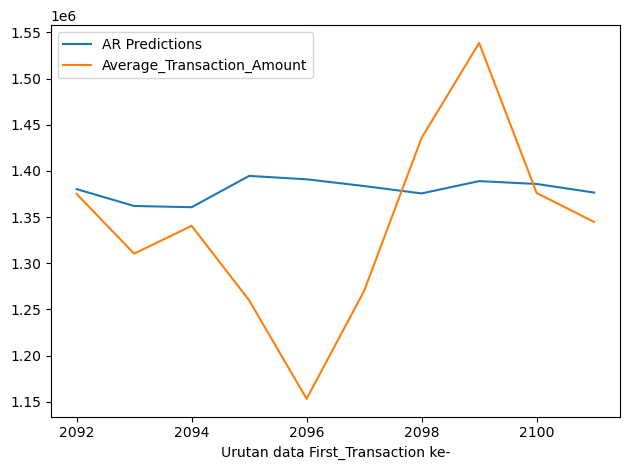

In [25]:
import matplotlib.pyplot as plt
pred.plot(legend=True)
test_data.plot(legend=True)
plt.xlabel('Urutan data First_Transaction ke-')
plt.tight_layout()
plt.show()